# Oscillation in eeg 

In [58]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [59]:
import pandas as pd 
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns
import scipy as sp 
import scipy.fftpack
import numpy as np


warnings.filterwarnings('ignore')

In [138]:
sampling_rate = 24_000
time = 1/sampling_rate # in seconds
unit_time = 's'
start = 1 # in seconds
end = 1.01 

Text(0.5, 1.0, 'EEG signal on the first 3000 rows')

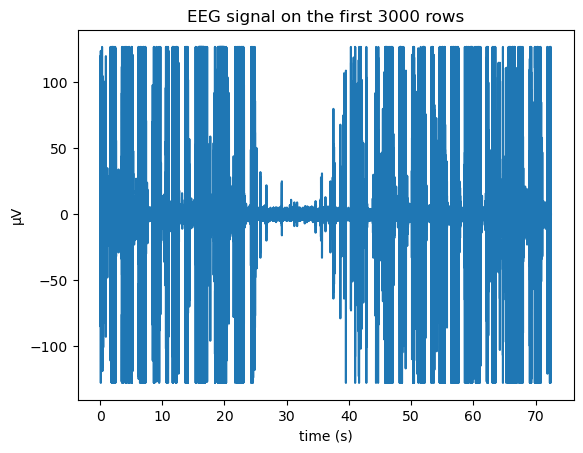

In [139]:
df = pd.read_csv('../data/EEGArchi13mPFC.txt')
# df = df.iloc[int(start*20_000):int(end*20_000)] 
df['time'] = df.index * time
df.rename(columns={'0': 'µV'}, inplace=True)
plt.plot(df['time'], df['µV'])
plt.xlabel(f'time ({unit_time})')
plt.ylabel('µV')
plt.title('EEG signal on the first 3000 rows')

Text(0, 0.5, 'µVf')

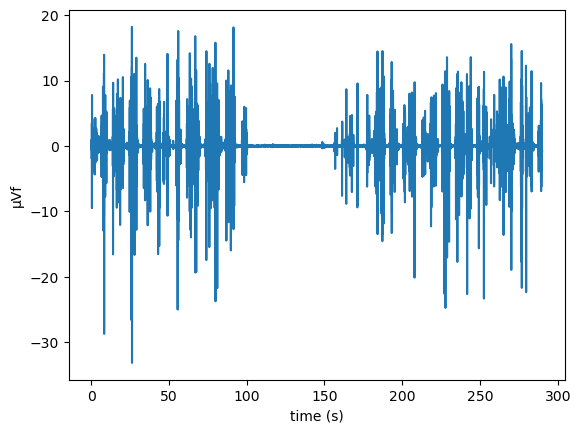

In [72]:
b, a = scipy.signal.iirfilter(4, Wn=12, fs=sampling_rate, btype="low", ftype="butter")
df['µVf'] = scipy.signal.filtfilt(b, a, df['µV'])
plt.plot(df['time'], df['µVf'])
plt.xlabel(f'time ({unit_time})')
plt.ylabel('µVf')

Text(0, 0.5, 'Amplitude')

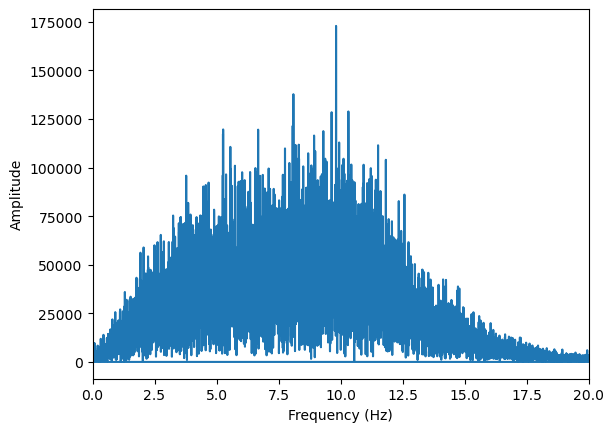

In [70]:
df["amp"] = np.abs(scipy.fftpack.fft(df['µVf'].values))
df["freq"] = scipy.fftpack.fftfreq(df['µVf'].size, d=time)
plt.plot(df["freq"], df["amp"])
plt.xlim(0,20)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")

## 1 Fourier transform

Text(0.5, 1.0, 'Fourier transform of the EEG signal')

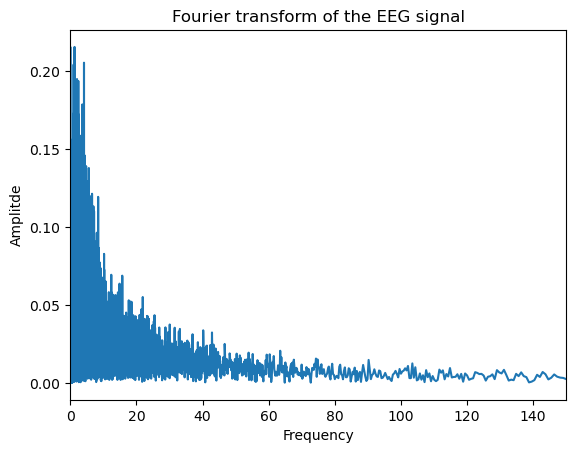

In [149]:
df_f = df.copy()

df_f['amplitude'] = sp.fftpack.fft(df_f['µV'])/len(df_f['µV'])
df_f["freq"] = 1/df_f['time']
plt.plot(df_f['freq'], np.abs(df_f['amplitude']))
plt.xlabel(f'Frequency')
plt.xlim(0, 150)
plt.ylabel('Amplitde')
plt.title('Fourier transform of the EEG signal')

- gamma = 30 Hz 
- Theta = 5-12 Hz

In [121]:
test = sp.signal.cwt(df_f['µV'], sp.signal.morlet2, np.arange(1, 100),dtype="complex128")

In [97]:
len(test), len(test[0]),test[0][0]

(99, 1739499, (0.06578013945583835+0.0044215140216547705j))

<AxesSubplot:>

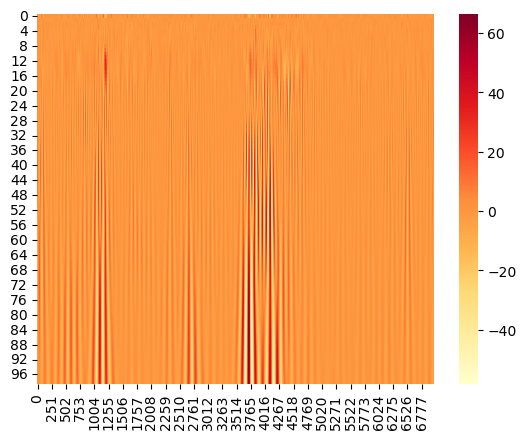

In [155]:
test_df = pd.DataFrame(test)
test_df = test_df.transpose()
test_df.index = df_f['time']
test_df = test_df.iloc[30_000:37_000]
test_df = test_df.to_numpy()
test_df = test_df.real
test_df = test_df.transpose()
sns.heatmap(test_df, cmap="YlOrRd")
# ax = plt.gca()
# ax.set_ylim(8,20)

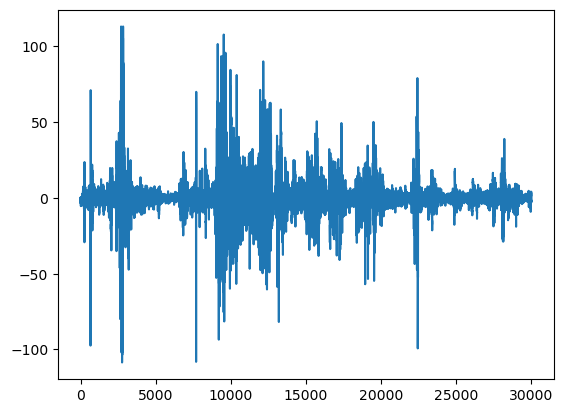

In [99]:
plt.plot(test[0][:30000])

In [152]:
# Create a function to get the band limited power of a signal 
def get_band_power(df, band, sampling_rate):
    # get the fourier transform of the signal 
    df['amplitude'] = sp.fftpack.fft(df['µV'])/len(df['µV'])
    # get the frequency of the signal 
    df["freq"] = 1/df['time']
    # get the power of the signal 
    df['power'] = np.abs(df['amplitude'])**2
    # get the band limited power 
    band_power = df.loc[(df['freq'] >= band[0]) & (df['freq'] <= band[1]), 'power'].sum()
    return band_power

get_band_power(df, [0, 4], sampling_rate)

517.4307830441174